In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import glob
import zipfile
import json
from IPython.core.display import HTML
import seaborn as sns
import spacy

In [13]:
!pip install scispacy

     |████████████████████████████████| 3.0 MB 406 kB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 382 kB/s eta 0:00:01
     |████████████████████████████████| 547 kB 780 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 287 kB/s eta 0:00:01
     |████████████████████████████████| 6.2 MB 331 kB/s eta 0:00:01     |███████████                     | 2.1 MB 250 kB/s eta 0:00:17
     |████████████████████████████████| 46 kB 220 kB/s eta 0:00:01
     |████████████████████████████████| 296 kB 265 kB/s eta 0:00:01
  Created wheel for scispacy: filename=scispacy-0.2.4-py3-none-any.whl size=35203 sha256=362dcaf2c2a22bb613cbf70ff9544e033070ccc49141c16ecfeee6d8ecad0c48
  Stored in directory: /home/daniel/.cache/pip/wheels/96/24/54/8c2bf5a6804275431a74bd256821500b3f2911d9ba8470a846
Successfully built scispacy
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
  Att

In [2]:
import scispacy

In [15]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_md-0.2.4.tar.gz

     |████████████████████████████████| 70.0 MB 35 kB/s  eta 0:00:01     |█████                           | 11.1 MB 77 kB/s eta 0:12:39     |████████████████▎               | 35.5 MB 216 kB/s eta 0:02:40     |██████████████████▉             | 41.2 MB 140 kB/s eta 0:03:25     |███████████████████████████▎    | 59.6 MB 473 kB/s eta 0:00:23     |█████████████████████████████▋  | 64.9 MB 153 kB/s eta 0:00:34
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.2.4-py3-none-any.whl size=70498245 sha256=b7a429c731c575e8397629ba8cfbd12985652f3e50011e52766bedc10ae74363
  Stored in directory: /home/daniel/.cache/pip/wheels/90/e4/01/703c1762f2ea429f1ca52703c83eeac63a668f043d92e0333f
Successfully built en-core-sci-md


In [3]:
import en_core_sci_md

In [17]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 358 kB/s eta 0:00:01    |██████████▋                     | 4.0 MB 318 kB/s eta 0:00:26     |████████████▉                   | 4.8 MB 179 kB/s eta 0:00:41     |████████████████                | 6.0 MB 89 kB/s eta 0:01:08
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011738 sha256=f6579df6270ccd7c5b1cf8b6aa36b685435b95ae9d666f296aad4c60037523a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-09nqy5nl/wheels/51/19/da/a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/daniel/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/home/daniel/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [4]:


corona_features = {'paper_id' : [] , 'title' : [] , 'abstract': [] , 'text' : [] }



In [5]:
corona_df = pd.DataFrame.from_dict(corona_features)

In [6]:
type(corona_df)

pandas.core.frame.DataFrame

In [7]:
corona_df.head()

,paper_id,title,abstract,text


In [100]:
json_filenames = glob.glob(f'{"./"}//**/*.json', recursive = True)

In [101]:
len(json_filenames)

29315

In [102]:
def return_corona_df(json_filenames, df):
    for file_name in json_filenames:
        row = {'paper_id': None, 'title': None,
           'abstract': None, 'text': None}
    
        with open(file_name) as json_data:
            if file_name == './sample_data/anscombe.json':
                continue
            
            data = json.load(json_data)

            row['paper_id'] = data['paper_id'].strip() # ' 345 ' -> '345'
            row['title'] = data['metadata']['title'].strip()

            abstract_list = [abstract['text'] for abstract in data['abstract']]
            abstract = '\n '.join(abstract_list)
            row['abstract'] = abstract.strip()

            text_list = [text['text'] for text in data['body_text']]
            text = '\n '.join(text_list)
            row['text'] = text.strip()

            df = df.append(row, ignore_index = True)
    return df
            
        

In [103]:
corona_df = return_corona_df(json_filenames, corona_df)

In [104]:
corona_df.head()

,paper_id,title,abstract,text
0,6b7bf82cb2c185080cb15545f5b26a65560c2f65,Perspectives on Fatigue from the Study of Chro...,Fatigue is a symptom whose causes are protean ...,Individuals have been documented as experienci...
1,abc5a91ea2ee193004b17ba999cb5e8ac6948591,,,H umanity has been profoundly affected by plag...
2,f182d59842dd585d7bfdfbdd55dfd8f828c51e1a,Induction of anti-viral immune responses by im...,Immune responses to the infectious bronchitis ...,Infectious bronchitis virus (IBV) is the proto...
3,d2f411afcee6662025ddded3a1f3f4fd6300cdca,How do we assess hospital cleaning? A proposal...,Increasing numbers of hospital-acquired infect...,"There has been recent concern from the public,..."
4,5f13b07d66a17f43c2ad7eec2f8601235ffdf05c,Antibody induction after combined application ...,"The compatibility, safety and interaction on a...",Vaccination has been used in feline medicine s...


In [105]:
corona_df.shape

(29315, 4)

In [106]:
len(corona_df['text'][0])

55476

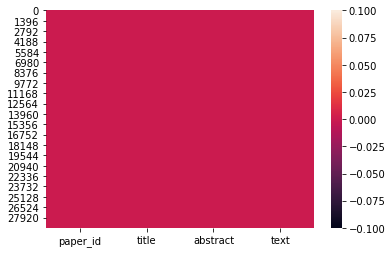

In [107]:
#Valores faltantes
sns.heatmap(corona_df.isnull())

In [108]:
len(corona_df[corona_df['paper_id'] == ''])

0

In [109]:
len(corona_df[corona_df['title'] == ''])

3583

In [110]:
len(corona_df[corona_df['abstract'] == ''])

8051

In [111]:
len(corona_df[corona_df['text'] == ''])

0

In [112]:
corona_df = corona_df[ corona_df['title'] != '']

In [113]:
corona_df = corona_df[ corona_df['abstract'] != '']

In [114]:
corona_df.drop_duplicates(['abstract' , 'text' , 'title'] , inplace = True)

In [115]:
corona_df.shape

(20211, 4)

In [116]:
# Amostra

corona_df = corona_df.sample(n = 500 , random_state = 1)

In [117]:
corona_df.shape

(500, 4)

In [118]:
corona_df.head()

,paper_id,title,abstract,text
11331,52ef40cbfbd93f506eb4d57a15a7fac62a43e778,Losartan attenuates chronic cigarette smoke ex...,Chronic cigarette smoking induces pulmonary ar...,Pulmonary arterial hypertension (PAH) is a gro...
13737,f85aebc7b1ea0c39c8aba435a4cb30ce95f80fcb,THE PATHOGENESIS OF AN ENTERIC INFECTION IN PI...,"Debouck, P., Pensaert, M. and Coussement, W., ...",Viruses commonly associated with diarrhea in p...
1534,43913d3de280bbe325e4e0a8f9e6e50dbfd342b3,Role of viral respiratory infections in asthma...,Viral respiratory tract infections are common ...,Viral respiratory tract infections can have pr...
11771,0735b0a2d783d9c7fa46dccb921eaf4e6b00be24,Rhinitis and Meningitis in Two Shelter Cats Ca...,In the past 6 years there have been increasing...,Streptococcal disease is common in both animal...
1088,22d303e69cc79f3d72d06e52153b53c6576176cf,One-step nanomorphology control of self-organi...,Uniform polymeric nanoparticles with various m...,Polymeric particles of nano-and micro-scale ha...


In [119]:
sample_text = corona_df['text'][11331]
sample_text

'Pulmonary arterial hypertension (PAH) is a group of diseases characterized by a progressive increase of pulmonary vascular resistance that finally cause right ventricular failure and premature death (Chaouat et al., 2008) . It has been generally accepted and acknowledged that alterations in the pulmonary vasculature, commonly marked by vascular proliferation/fibrosis, remodeling, and vessel occlusion, leads to most, if not all, forms of pulmonary arterial hypertension (Humbert et al., 2004) . As a key factor blamed for the alterations in the pulmonary vasculature, cigarette smoking has been reported to result in muscularization of pulmonary vessels in the presence or absence of chronic obstructive pulmonary disease (Wright et al., 2003 (Wright et al., , 2004 Churg et al., 2006; Santos et al., 2002) . Moreover, increased expression of vasoactive mediators (e.g., endothelin-1 and vascular endothelial growth factor) have been detected in the guinea pig lungs after chronic smoke exposure 

In [36]:
nlp = en_core_sci_md.load(disable = ['tagger' , 'parser' , 'ner'])

nlp.max_length = 2000000


In [121]:
print(spacy.lang.en.stop_words.STOP_WORDS)

{'sometime', '‘d', 'give', '‘re', 'when', 'across', 'four', 'noone', 'seem', 'the', 'ever', 'unless', 'anyway', 'due', 'there', 'he', 'n’t', 'only', 'nine', 'if', 'over', 'whereafter', 'itself', 'five', 'most', 'my', 'together', 'every', 'many', 'throughout', 'has', 'do', 'anyone', '’ve', 'nobody', 'even', 'else', 'therefore', '’m', 'third', 'very', 'already', 'moreover', 'may', 'each', 'any', 'thereby', 'nothing', 'former', 'bottom', 'back', 'them', '‘ve', 'forty', 'beyond', 'that', 'otherwise', 'namely', 'top', 'because', 'regarding', 'also', 'can', 'from', 'sixty', "'d", 'two', 'meanwhile', 'whereas', 'all', 'off', 'myself', 'almost', 'been', 'therein', 'indeed', 'while', 'hereupon', 'whose', 'within', 'except', 'becoming', 'this', 'hereafter', 'still', "'ve", "'re", 'now', 'often', 'last', 'such', 'too', 'nevertheless', '’s', 'ourselves', 'yours', 'hence', 'herein', 'everywhere', "n't", 'why', 'whoever', 'between', 'three', 'how', 'using', 'will', 'i', 'whither', 'had', 'her', 'alo

In [122]:
len(spacy.lang.en.stop_words.STOP_WORDS)

326

In [123]:
new_stop_words = ['et' , 'al' , 'doi' , 'copyright' , 'http' , 'http' , 'https' , 'fig' 
                 , 'table' , 'result' , 'show']

for word in new_stop_words:
    nlp.vocab[word].is_stop = True

In [34]:
def spacy_tokenizer(sentence):
    
    sentence = sentence.lower()
    
    list = []
    
    list = [word.lemma_ for word in nlp(sentence)  if not (word.is_stop or word.like_num or word.is_punct or word.is_space or len(word) == 1)]
    
    list = ' '.join([str(element) for element in list])
    return list

In [125]:
test = '1 ' + sample_text

result = spacy_tokenizer(test)

result

'pulmonary arterial hypertension pah group disease characterize progressive increase pulmonary vascular resistance finally cause right ventricular failure premature death chaouat al. generally accept acknowledge alteration pulmonary vasculature commonly mark vascular proliferation/fibrosis remodel vessel occlusion lead form pulmonary arterial hypertension humbert al. key factor blame alteration pulmonary vasculature cigarette smoke report muscularization pulmonary vessel presence absence chronic obstructive pulmonary disease wright al. wright al. churg al. santos al. increase expression vasoactive mediator e.g. endothelin-1 vascular endothelial growth factor detect guinea pig lung chronic smoke exposure mediator report associate vascular remodel elevate pulmonary arterial pressure precise mechanism chronic cigarette smoke exposure produce pah poorly understand renin-angiotensin system ras implicate pathogenesis pulmonary vascular remodel pah numb study instance increase expression angi

In [37]:
corona_df['text'] = corona_df['text'].apply(spacy_tokenizer)

AttributeError: 'float' object has no attribute 'lower'

In [127]:
print(sample_text)

Pulmonary arterial hypertension (PAH) is a group of diseases characterized by a progressive increase of pulmonary vascular resistance that finally cause right ventricular failure and premature death (Chaouat et al., 2008) . It has been generally accepted and acknowledged that alterations in the pulmonary vasculature, commonly marked by vascular proliferation/fibrosis, remodeling, and vessel occlusion, leads to most, if not all, forms of pulmonary arterial hypertension (Humbert et al., 2004) . As a key factor blamed for the alterations in the pulmonary vasculature, cigarette smoking has been reported to result in muscularization of pulmonary vessels in the presence or absence of chronic obstructive pulmonary disease (Wright et al., 2003 (Wright et al., , 2004 Churg et al., 2006; Santos et al., 2002) . Moreover, increased expression of vasoactive mediators (e.g., endothelin-1 and vascular endothelial growth factor) have been detected in the guinea pig lungs after chronic smoke exposure a

In [128]:
len(sample_text)

27115

In [129]:
print(corona_df['text'][11331])

pulmonary arterial hypertension pah group disease characterize progressive increase pulmonary vascular resistance finally cause right ventricular failure premature death chaouat al. generally accept acknowledge alteration pulmonary vasculature commonly mark vascular proliferation/fibrosis remodel vessel occlusion lead form pulmonary arterial hypertension humbert al. key factor blame alteration pulmonary vasculature cigarette smoke report muscularization pulmonary vessel presence absence chronic obstructive pulmonary disease wright al. wright al. churg al. santos al. increase expression vasoactive mediator e.g. endothelin-1 vascular endothelial growth factor detect guinea pig lung chronic smoke exposure mediator report associate vascular remodel elevate pulmonary arterial pressure precise mechanism chronic cigarette smoke exposure produce pah poorly understand renin-angiotensin system ras implicate pathogenesis pulmonary vascular remodel pah numb study instance increase expression angio

In [130]:
len(corona_df['text'][11331])

18887

In [131]:
for index , row in corona_df.iterrows():
    print(row['paper_id'] , row['title'])
    text_file = open('corpus/' + row['paper_id'] + '.txt' , 'w')
    n  = text_file.write(row['text'])
    text_file.close()

52ef40cbfbd93f506eb4d57a15a7fac62a43e778 Losartan attenuates chronic cigarette smoke exposure-induced pulmonary arterial hypertension in rats: Possible involvement of angiotensin-converting enzyme-2
f85aebc7b1ea0c39c8aba435a4cb30ce95f80fcb THE PATHOGENESIS OF AN ENTERIC INFECTION IN PIGS, EXPERI- MENTALLY INDUCED BY THE CORONAVIRUS-LIKE AGENT, CV 777
43913d3de280bbe325e4e0a8f9e6e50dbfd342b3 Role of viral respiratory infections in asthma and asthma exacerbations
0735b0a2d783d9c7fa46dccb921eaf4e6b00be24 Rhinitis and Meningitis in Two Shelter Cats Caused by Streptococcus equi subspecies zooepidemicus
22d303e69cc79f3d72d06e52153b53c6576176cf One-step nanomorphology control of self-organized projection coronas in uniform polymeric nanoparticles *
e296fa71274bad6cabcf683a2ba47e58b1326877 International Journal of Health Geographics Musings on privacy issues in health research involving disaggregate geographic data about individuals
435bba6a9fa47ef09570e309bb958a36bac86f8a Characterization of 

795a5e13033978fe1a59213b0962327439a1c8f1 Preventive and therapeutic efficacy of halofuginone-lactate against Cryptosporidium parvum in spontaneously infected calves: A centralised, randomised, double-blind, placebo-controlled study The Veterinary Journal
fb9e05516efdae3600796552393fd3e3c26cb3d5 Clinical Medicine An Inverse Relationship between Hyperuricemia and Mortality in Patients Undergoing Continuous Ambulatory Peritoneal Dialysis
16b708aa771f7acad4f74a79079c2704f1a68304 Wind tunnel tests of inter-flat pollutant transmission characteristics in a rectangular multi-storey residential building, part A: Effect of wind direction
a38e42b1f6af103e0fca657462dc516ad51cf7e9 Human-livestock contacts and their relationship to transmission of zoonotic pathogens, a systematic review of literature-NC-ND license (http://creativecommons.org/licenses/by-nc-nd/4.0/)
0e44cf0bec7179401a27d70917da6fe52da1742c Enteric coronavirus infection in adult horses
c65313a7ec5e51f26d8b5970b3742f7fed01f832 Pathways

In [132]:
from nltk.corpus import PlaintextCorpusReader

corpus = PlaintextCorpusReader('corpus' , '.*')


In [133]:
files = corpus.fileids()

In [134]:
files[0]

'001ec025dd65db8a47827c8f49d9c41d60f35d00.txt'

In [135]:
corpus.raw('001ec025dd65db8a47827c8f49d9c41d60f35d00.txt')

'parvovirus small icosahedral virus infect animal species include human worldwide canine parvovirus type-2 causal agent canine parvoviral enteritis pve severe disease cause nearby morbidity mortality unvaccinated adult puppy respectively clinical presentation pve range mild severe base clinical sign physical examination common clinical sign puppy include acute severe vomit bloody diarrhoea fever dehydration lethargy complication cardiac damage death permanent myocardial damage systemic inflammatory response syndrome sir prior sepsis describe dog saliva prove useful biofluid diagnostic condition leishmaniosis helicobacter infection evaluation stress use noninvasive specimen saliva provide advantage compare invasive method safe personal patient easy collect pain-free cause reduce sample stress saliva potential advantage versus non-invasive sample faeces usually need laborious pre-treatment prior analysis particular case pve describe poor sensitivity faeces rapid antigen elisa test envisi

In [136]:
words = corpus.words()

print(words)

['parvovirus', 'small', 'icosahedral', 'virus', ...]


In [137]:
len(words)

1317923

In [138]:
frequency = nltk.FreqDist(words)

most_common = frequency.most_common(100)

most_common

[('-', 56431),
 ('.', 19595),
 ('cell', 13502),
 ('/', 8829),
 ('virus', 7658),
 ('protein', 6950),
 ('al', 6799),
 ('study', 6637),
 ('infection', 6276),
 ('show', 4510),
 ('high', 3906),
 ('viral', 3758),
 ('disease', 3745),
 ('1', 3657),
 ('datum', 3410),
 ('sequence', 3383),
 ('result', 3374),
 ('group', 3325),
 ('patient', 3301),
 ('human', 3184),
 ('figure', 3153),
 ('increase', 3139),
 ('control', 3122),
 ('sample', 3086),
 ('response', 3054),
 ('gene', 3037),
 ('include', 3017),
 ('time', 2985),
 ('level', 2898),
 ('report', 2818),
 ('analysis', 2798),
 ('expression', 2749),
 ('antibody', 2718),
 ('fig', 2687),
 ('test', 2674),
 ('case', 2540),
 ('model', 2540),
 ('2', 2458),
 ('find', 2373),
 ('mouse', 2356),
 ('specific', 2328),
 ('different', 2323),
 ('health', 2316),
 ('activity', 2249),
 ('effect', 2243),
 ('day', 2232),
 ('rna', 2226),
 ('system', 2223),
 ('infect', 2215),
 ('sars', 2215),
 ('numb', 2205),
 ('low', 2199),
 ('bind', 2135),
 ('assay', 2087),
 ('follow', 205

In [139]:
from matplotlib.colors import ListedColormap

color_map = ListedColormap(['orange' , 'green' , 'red' , 'magenta' ])

In [140]:
from wordcloud import WordCloud

cloud = WordCloud(background_color = 'white' , max_words=100 , colormap = color_map)


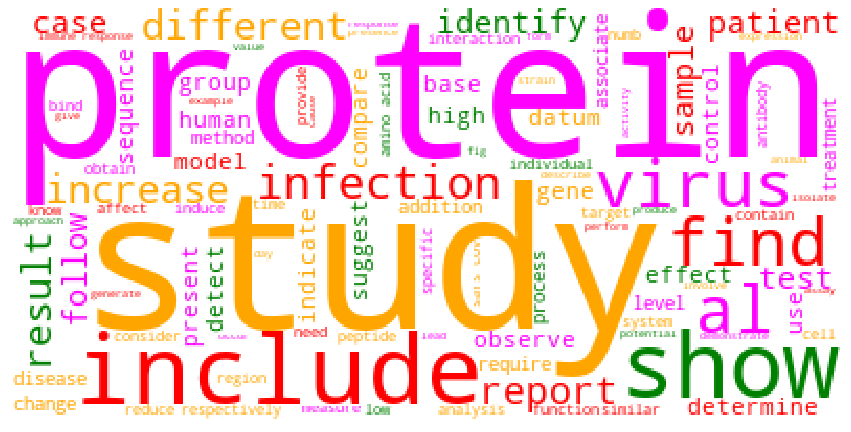

In [141]:
cloud = cloud.generate(corona_df['text'].str.cat(sep = '\n'))
plt.figure(figsize = (15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [142]:
corona_df.to_csv('corona_df.csv')

In [143]:
text = str(corona_df['text'][11331])

print(text)

pulmonary arterial hypertension pah group disease characterize progressive increase pulmonary vascular resistance finally cause right ventricular failure premature death chaouat al. generally accept acknowledge alteration pulmonary vasculature commonly mark vascular proliferation/fibrosis remodel vessel occlusion lead form pulmonary arterial hypertension humbert al. key factor blame alteration pulmonary vasculature cigarette smoke report muscularization pulmonary vessel presence absence chronic obstructive pulmonary disease wright al. wright al. churg al. santos al. increase expression vasoactive mediator e.g. endothelin-1 vascular endothelial growth factor detect guinea pig lung chronic smoke exposure mediator report associate vascular remodel elevate pulmonary arterial pressure precise mechanism chronic cigarette smoke exposure produce pah poorly understand renin-angiotensin system ras implicate pathogenesis pulmonary vascular remodel pah numb study instance increase expression angio

In [144]:
nlp_ent = spacy.load('en')
nlp_ent.max_length = 2000000

In [146]:
doc = nlp_ent(text)

In [149]:
for entity in doc.ents:
    if(entity.label_ == 'NORP' or entity.label_ == 'GPE'):
        print(entity.text, entity.label_)

metabolite NORP
chengdu GPE
china GPE
santa cruz GPE
tokyo GPE
japan GPE
tokyo GPE
japan GPE
1:500 NORP
santa cruz GPE
santa cruz GPE
beijing GPE
china GPE
phoenix GPE
tokyo GPE
japan GPE
chicago GPE
vivo GPE
ang GPE


In [151]:
from spacy import displacy

displacy.render(doc, style = 'ent' , jupyter = True)

In [153]:
gpe = []

for index, row in corona_df.iterrows():
    text = row['text']
    doc = nlp_ent(text)
    for entity in doc.ents:
        if entity.label_ == 'GPE':
            gpe.append(str(entity.text))


In [154]:
print(gpe)

['chengdu', 'china', 'santa cruz', 'tokyo', 'japan', 'tokyo', 'japan', 'santa cruz', 'santa cruz', 'beijing', 'china', 'phoenix', 'tokyo', 'japan', 'chicago', 'vivo', 'ang', 'turkey', 'turkey', 'th1', 'denmark', 'johnston', 'british columbia', 'uk', 'hong kong', 'london', 'canada', 'uk', 'canada', 'uk', 'rome', 'rhode island', 'hipaa', 'new orleans', 'approach(es', 'skeleton', 'palo alto', 'pool pool', 'xi', 'mrna', 'sg dissolution', 'sg', 'cy3 dapi', 'https://sourceforge.net/projects/buho/', 'sg', 'sg', 'sg', 'sg', 'mrna', 'mrna', 'sg', 'sg', 'sg', 'sg', 'sg', 'sg', 'sg', 'peif2a', 'peif2a', 'peif2a', 'sg', 'sg', 'sg dissolution', 'dsrna', 'sg', 'sg', 'sg', 'santa cruz', '1:100', 'cy3 jackson', 'san diego', 'germany', 'sg', 'new sgs sgs detect', 'buho/', 'singapore', 'singapore', 'hong al.', 'orf088', 'vp88gfp', 'vp88gfp', 'va', 'va', 'vp88gfp', 'vp88gfp', 'va', 'vp88gfp', 'va', 'vp88gfp', 'singapore', 'orf088', 'canada', 'g', 'tokyo', 'japan', 'hcov-', 'ns5a', 'ingenasa spain', 'sant

In [155]:
values_gpe , counts_gpe = np.unique(np.array(gpe) , return_counts = True)


In [156]:
gpe_df = pd.DataFrame({'value' : values_gpe  , 'counts' : counts_gpe })

In [157]:
gpe_df.head()

,value,counts
0,-adenosina,1
1,"1,4-dihydro-4-pyridinyl",1
2,1-way,2
3,100kv,1
4,11(a1,1


In [158]:
gpe_df.shape

(1554, 2)

In [159]:
gpe_df_filtered = gpe_df[ gpe_df.counts > 50]

In [160]:
gpe_df_filtered.shape

(15, 2)

In [161]:
gpe_df_filtered.head(15)

,value,counts
194,canada,76
227,china,445
360,egypt,58
443,germany,92
543,hong kong,247
657,japan,126
920,mrna,61
980,neutrophil,69
1048,optimal,61
1222,saudi arabia,86


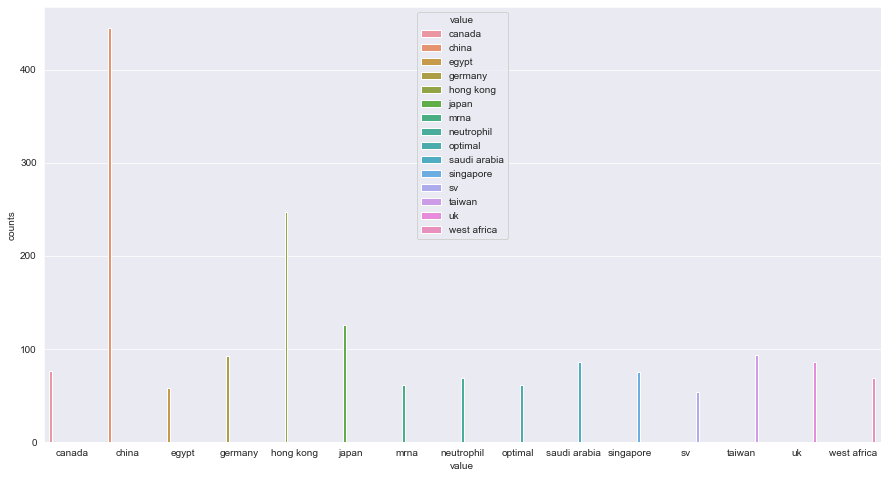

In [165]:
sns.set({'figure.figsize' : (15,8)})
sns.barplot( x  = 'value' , y = 'counts' , hue = 'value' , data = gpe_df_filtered)

In [167]:
text = nltk.Text(corpus.words())

In [171]:
match = text.concordance('smoking' , width = 150 , lines  = 30)

Displaying 7 of 7 matches:
evious finding hypothesize activate ras contribute development chronic smoking - induced pah losartan specific at1 receptor blocker exert influence r
 rondelet al . determine losartan therapeutic effect chronic cigarette smoking - induced pah addition losartan show modulatory effect expression angi
nduced pah kuba al . li al . ferreira al . elucidate ace2 role chronic smoking - induced pah recent study show antihypertensive action at1 antagonist
ult consistent finding vivo study losartan treatment attenuate chronic smoking - induced pulmonary artery remodel ace2 reduction rat lung present stu
 month compare sm group month result suggest losartan therapeutic role smoking - induced pulmonary artery remodel pah ace2 serve mechanism report gui
el word losartan inhibit effect ang ii decrease ang ii level cigarette smoking - induced pah ras ace cleave ang generate potent vasoconstrictor ang i
e culture rat primary pasmcs result suggest losartan attenuate chronic sm

In [173]:
match = text.concordance('pulmonary' , width = 150 , lines  = 30)

Displaying 30 of 290 matches:
t periorbital crust purulent exudate nares nasal passage sinus larynx pulmonary congestion diffuse redden femoral bone marrow carcase cat freeze post
ation conduct follow thaw body cat exhibit redden femoral bone marrow pulmonary congestion abnormality note gross examination brain nasal passage tis
ess syndrome ards describe adult present tachypnea hypoxemia decrease pulmonary compliance understand diagnosis management ards advance greatly resea
rm influenza h1n1 virus develope ards study child die find histologic pulmonary finding reflective ards autopsy argentina farias al . study patient a
respiratory failure explain heart failure fluid overload evidence new pulmonary infiltrate ( s chest radiograph consistent parenchymal disease finall
cidosis maintenance fluid rate ml / kg / day adult crias respectively pulmonary edema risk fluid administer fast ml / kg / h palliative therapy compl
 therapeutic diuresis furosemide indicate animal respiratory distress 

In [174]:
type(match)

NoneType

In [176]:
string = 'spread wuhan city china infect traveller cause sporadic secondary transmission city secondary city epidemic' 

search_string = 'city'

In [177]:
print(string.find(search_string))

13


In [178]:
string[13]

'c'

In [179]:
string[13 : 13 + 10]

'city china'

In [180]:
string[13  - 10 : 13]

'ead wuhan '

In [181]:
string[13-30 : 13]

''

In [183]:
string[13: 13 + 100000]

'city china infect traveller cause sporadic secondary transmission city secondary city epidemic'

In [188]:


def find_texts(input_str, search_str , number_of_words):
    
    l = []
    index = 0
    number_of_words = number_of_words
    while(index < len(input_str)):
        i = input_str.find(search_str , index)
        if( i == -1 ):
            return l
        if(input_str[i  - number_of_words : i ] == ''):
            start = 0
        else:
            start = i - number_of_words
        l.append(input_str[start:i] + input_str[i : i + number_of_words])
        index = i  + 1
        
    return l
        
        


In [190]:
texts = find_texts(string , search_string , 50)
texts

['spread wuhan city china infect traveller cause sporadic seconda',
 't traveller cause sporadic secondary transmission city secondary city epidemic',
 'se sporadic secondary transmission city secondary city epidemic']

In [202]:
display(HTML(f'<h1>{search_string.upper()}</h1>'))
display(HTML(f"""<p><strong>Number of matches:</strong> {len(texts)}</p>"""))
for i in texts:
    marked_text = str(i.replace(search_string, f"<mark>{search_string}</mark>"))
    display(HTML(f"""<blockquote>... {marked_text} ...</blockquote>"""))

In [215]:
search_string = 'pulmonary disease'

In [216]:
search_string = spacy_tokenizer(search_string)

search_string

'pulmonary disease'

In [221]:

def find_all_texts(input_str, search_str, number_of_words):
    text_list = []
    index = 0
    number_of_words = number_of_words
    while index < len(input_str):
        i = input_str.find(search_str, index)
        if i == -1:
            return text_list
    
        if input_str[i-number_of_words:i] == '':
            start = 0
        else:
            start = i - number_of_words

        text_list.append(input_str[start:i] + input_str[i:i+number_of_words])
        index = i + 1
    return text_list
        

In [223]:
documents = []
for index, row in corona_df.iterrows():
    documents.append(find_all_texts(row['text'], search_string, 40))

In [224]:
len(documents)

500

In [225]:
for doc in documents:
    if doc != []:
        print(doc)

['el presence absence chronic obstructive pulmonary disease wright al. wright al. ']
['ifest pulmonary and/or disseminate extrapulmonary disease detail discussion late', 'ent fever chest pain hemoptysis dyspnea pulmonary disease involve lung parenchym']
['ease asthma cardiac chronic obstructive pulmonary disease malnutrition hepatic n']
['exacerbation chronic obstructive pulmonary disease copd episode symptom w', 'd global initiative chronic obstructive pulmonary disease gold force expiratory ', 'recently exact-pro exacerbation chronic pulmonary disease tool -patient-reported', 'r phenotype patient chronic obstructive pulmonary disease copd experience exacer']
['cancer hero promote chronic obstructive pulmonary disease wing centre stage give']
['aturity intrauterine growth retardation pulmonary disease abnormality labor/deli']
[' all-age compromise immune system cardiopulmonary disease follow transplantation']
['ovascular disease stroke cancer chronic pulmonary disease treat type diabe

In [227]:
for index, row in corona_df.iterrows():
    texts = find_all_texts(row['text'] , search_string , 400)
    if( texts == [] ):
        continue
        
    paper_id = row['paper_id']
    title = row['title']
    
    display(HTML(f'<h1>{search_string.upper()}</h1>'))
    display(HTML(f"""<p>
    <strong>Title: </strong> {title}</br>
     <strong>ID: </strong> {paper_id}</br>
    <strong>Number of matches:</strong> {len(texts)}</p>"""))
    
    for i in texts:
        marked_text = str(i.replace(search_string, f"<mark>{search_string}</mark>"))
        display(HTML(f"""<blockquote>... {marked_text} ...</blockquote>"""))
        


In [228]:
string = 'spread wuhan city china infect traveller cause sporadic secondary transmission city secondary city epidemic' 


In [229]:
search_strings =['city' , 'traveller']

tokens_list = [ nlp(item) for item in search_strings]

In [230]:
tokens_list

[city, traveller]

In [232]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

matcher.add('SEARCH' , None , *tokens_list)

In [233]:
doc = nlp(string)
matches = matcher(doc)
matches

[(8661325627334373315, 2, 3),
 (8661325627334373315, 5, 6),
 (8661325627334373315, 10, 11),
 (8661325627334373315, 12, 13)]

In [234]:
doc[2:3]

city

In [235]:
doc[5:6]

traveller

In [236]:
doc[10:11]

city

In [237]:
doc[12:13]

city

In [238]:
doc[10-5:10+5]

traveller cause sporadic secondary transmission city secondary city epidemic

In [239]:
matches[0]

(8661325627334373315, 2, 3)

In [240]:
matches[0][0]

8661325627334373315

In [241]:
matches[0][1]

2

In [242]:
matches[0][2]

3

In [243]:
doc[2:3]

city

In [244]:
doc[matches[0][1] : matches[0][2]]

city

In [248]:
search_strings = ['smoking' , 'pulmonary disease']
tokens_list = [nlp(spacy_tokenizer(item)) for item in search_strings]

In [249]:
tokens_list

[smoke, pulmonary disease]

In [250]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH' , None , *tokens_list)
number_of_words = 50

In [257]:
search_strings_html = ' '.join([ str(element) for element in search_strings ])
search_strings_html

'smoking pulmonary disease'

In [258]:
for index, row in corona_df.iterrows():
    marked_text = ''
    doc = nlp(row['text'])
    paper_id = row['paper_id']
    title = row['title']
    matches = matcher(doc)
    if(matcher == []):
        continue
    display(HTML(f'<h1>{search_strings_html.upper()}</h1>'))
    display(HTML(f"""<p>
    <strong>Title: </strong> {title}</br>
     <strong>ID: </strong> {paper_id}</br>
    <strong>Number of matches:</strong> {len(matches)}</p>"""))
    for i in matches :
        start = i[1] - number_of_words
        if( start < 0 ):
            start = 0
        for j in range(len(tokens_list)):
            if(doc[i[1]  : i[2]].similarity(tokens_list[j]) == 1):
                search_text = str(tokens_list[j])
                marked_text += str(doc[start : i[2] + number_of_words]).replace(search_text
                , f"<mark>{search_text}</mark>")
                marked_text += "</br></br>"
    display(HTML(f""" <blockquote> ... {marked_text} ...  </blockquote>   """))
    

In [ ]:
!pip install fuzzywuzzy

In [261]:
from fuzzywuzzy import fuzz

In [262]:
#Similaridade em ordem

fuzz.ratio('Apple Inc.' , 'Apple' )

67

In [263]:
#Similaridade em ordem

fuzz.ratio('Apple' , 'Apple' )

100

In [264]:
#Similaridade parcial

fuzz.partial_ratio('Apple Inc.' , 'Apple')

100

In [266]:
#Similaridade ignorando ordem
fuzz.token_sort_ratio('Lakers x Bulls' , 'Bulls x Lakers')

#Note que a função olha para os tokens

100

In [267]:
# Ignorando duplicatas
fuzz.token_set_ratio('Today we have Lakers x Bulls' , 'Bulls x Lakers')

100

In [269]:
search_string =  'Guidance on ways to scale up NPIs in a more coordinated way (e.g., establish funding, infrastructure and authorities to support real time, authoritative (qualified participants) collaboration with all states to gain consensus on consistent guidance and to mobilize resources to geographic areas where critical shortfalls are identified) to give us time to enhance our health care delivery system capacity to respond to an increase in cases. Rapid design and execution of experiments to examine and compare NPIs currently being implemented. DHS Centers for Excellence could potentially be leveraged to conduct these experiments'

In [271]:
search_string = spacy_tokenizer(search_string)

print(search_string)

guidance way scale npis coordinate way e.g. establish fund infrastructure authority support real time authoritative qualify participant collaboration state gain consensus consistent guidance mobilize resource geographic area critical shortfall identify time enhance health care delivery system capacity respond increase case rapid design execution experiment examine compare npis currently implement dhs center excellence potentially leverage conduct experiment


In [272]:
ratio = []
partial_ratio = []
sort_ratio = []
set_ratio = []
for index , row in corona_df.iterrows():
    ratio.append(fuzz.ratio(row['text'] , search_string))
    partial_ratio.append(fuzz.partial_ratio(row['text'] , search_string))
    sort_ratio.append(fuzz.token_sort_ratio(row['text'] , search_string))
    set_ratio.append(fuzz.token_set_ratio(row['text'] , search_string))

In [273]:
len(ratio)

500

In [274]:
np.array(ratio).mean()

0.026

In [275]:
ratio

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [276]:
np.array(partial_ratio).mean()

3.278

In [277]:
np.array(sort_ratio).mean()

0.014

In [278]:
np.array(set_ratio).mean()

41.352

In [279]:
corona_df.head()

,paper_id,title,abstract,text
11331,52ef40cbfbd93f506eb4d57a15a7fac62a43e778,Losartan attenuates chronic cigarette smoke ex...,Chronic cigarette smoking induces pulmonary ar...,pulmonary arterial hypertension pah group dise...
13737,f85aebc7b1ea0c39c8aba435a4cb30ce95f80fcb,THE PATHOGENESIS OF AN ENTERIC INFECTION IN PI...,"Debouck, P., Pensaert, M. and Coussement, W., ...",virus commonly associate diarrhea pig transmis...
1534,43913d3de280bbe325e4e0a8f9e6e50dbfd342b3,Role of viral respiratory infections in asthma...,Viral respiratory tract infections are common ...,viral respiratory tract infection profound eff...
11771,0735b0a2d783d9c7fa46dccb921eaf4e6b00be24,Rhinitis and Meningitis in Two Shelter Cats Ca...,In the past 6 years there have been increasing...,streptococcal disease common animal man strept...
1088,22d303e69cc79f3d72d06e52153b53c6576176cf,One-step nanomorphology control of self-organi...,Uniform polymeric nanoparticles with various m...,polymeric particle nano-and micro-scale extrem...


In [66]:
corona_df['abstract'] = corona_df['abstract'].apply(spacy_tokenizer)

In [283]:
corona_df.head()

,paper_id,title,abstract,text
11331,52ef40cbfbd93f506eb4d57a15a7fac62a43e778,Losartan attenuates chronic cigarette smoke ex...,chronic cigarette smoke induce pulmonary arter...,pulmonary arterial hypertension pah group dise...
13737,f85aebc7b1ea0c39c8aba435a4cb30ce95f80fcb,THE PATHOGENESIS OF AN ENTERIC INFECTION IN PI...,debouck p. pensaert m. coussement w. pathogene...,virus commonly associate diarrhea pig transmis...
1534,43913d3de280bbe325e4e0a8f9e6e50dbfd342b3,Role of viral respiratory infections in asthma...,viral respiratory tract infection common usual...,viral respiratory tract infection profound eff...
11771,0735b0a2d783d9c7fa46dccb921eaf4e6b00be24,Rhinitis and Meningitis in Two Shelter Cats Ca...,past year increase report describe outbreak se...,streptococcal disease common animal man strept...
1088,22d303e69cc79f3d72d06e52153b53c6576176cf,One-step nanomorphology control of self-organi...,uniform polymeric nanoparticle morphology proj...,polymeric particle nano-and micro-scale extrem...


In [281]:
ratio = []
partial_ratio = []
sort_ratio = []
set_ratio = []
for index , row in corona_df.iterrows():
    ratio.append(fuzz.ratio(row['text'] , search_string))
    partial_ratio.append(fuzz.partial_ratio(row['abstract'] , search_string))
    sort_ratio.append(fuzz.token_sort_ratio(row['abstract'] , search_string))
    set_ratio.append(fuzz.token_set_ratio(row['abstract'] , search_string))

In [284]:
np.array(ratio).mean()

0.026

In [285]:
np.array(partial_ratio).mean()

10.768

In [286]:
np.array(sort_ratio).mean()

1.398

In [287]:
np.array(set_ratio).mean()

9.052

In [290]:
scores = {}

for index , row in corona_df.iterrows():
    scores[row['paper_id']] = fuzz.token_set_ratio(row['text'] , search_string)

In [291]:
print(scores)

{'52ef40cbfbd93f506eb4d57a15a7fac62a43e778': 40, 'f85aebc7b1ea0c39c8aba435a4cb30ce95f80fcb': 25, '43913d3de280bbe325e4e0a8f9e6e50dbfd342b3': 40, '0735b0a2d783d9c7fa46dccb921eaf4e6b00be24': 26, '22d303e69cc79f3d72d06e52153b53c6576176cf': 29, 'e296fa71274bad6cabcf683a2ba47e58b1326877': 63, '435bba6a9fa47ef09570e309bb958a36bac86f8a': 45, 'aa2d1de5f5f45ad793fffda7679200d35e971b4f': 36, '0529ed2074b15413b032e82de1fcce37efde51a2': 32, 'cfa02214264de0228b64d968740c91ce88023511': 46, '317f9c2b15b77682a875328e023b5b62a9eb2896': 43, '16ec906ec64d50865172d2c443cf03ce1848b71d': 50, '7ca676ee60e4446f8f9b57111b050bc287656efa': 19, '6cef5ad67e84f17e96de7c2d9af64487a4637cb9': 47, '1f8a1700ee536e43e65c9ba4df7f87b0461ee999': 52, '13d1553d10b93b5ed937bf2ff7cdb420b3540cd0': 22, '357f5b1caf114fdb8a60870473af88bc9017bf14': 49, '1dc18baed79c3ae009d73d109a7aaec9f9195a2f': 46, '6fa76790be17b5874ff6402f20c43a89e5caaf43': 46, '54d47fc738b0b5b98eb4ba6823f6f7d35075b323': 34, 'e3b40cc8e0e137c416b4a2273a4dca94ae8178

In [292]:
scores['52ef40cbfbd93f506eb4d57a15a7fac62a43e778']

40

In [293]:
import operator
sorted_scores = sorted(scores.items() , key = operator.itemgetter(1) , reverse = True)

In [294]:
sorted_scores[0:10]

[('8c0e2ac9d7085f613692fbce4f20972f718fc8b0', 82),
 ('6f3b8e8054ed4441a63f60b91f3381d1062a7813', 78),
 ('22e2b707c4c937149359909ecca2b28727a36210', 77),
 ('998548cf6bc83b4dfc9d061a2a4425cc9506e82e', 76),
 ('4facb7cbe620956211550e1a035b0281f2db5cfc', 74),
 ('914de47c696bfe6ff5e8a9158b8bea650af7a1fa', 73),
 ('efccb0c416f75cebdc57cc9013349d12bcb8df2d', 73),
 ('14a0b8d9f05d4baef14cfa9178748cb9d504d523', 72),
 ('8b90904ece479c8519269255a21da469ba8ed281', 71),
 ('5719f6793a83d07462521f608b01fe66efeb6500', 71)]

In [295]:
corona_df.loc[corona_df['paper_id'] == '52ef40cbfbd93f506eb4d57a15a7fac62a43e778' ]

,paper_id,title,abstract,text
11331,52ef40cbfbd93f506eb4d57a15a7fac62a43e778,Losartan attenuates chronic cigarette smoke ex...,chronic cigarette smoke induce pulmonary arter...,pulmonary arterial hypertension pah group dise...


In [298]:
pd.set_option('display.max_colwidth' , None)
display(HTML(f'<h6>{search_strings_html.upper()}</h6>'))
for i in sorted_scores[:10]:
    df = corona_df.loc[corona_df['paper_id'] == i[0]]
    display(HTML(f"""<p>
    <strong>Title: </strong> {df.title}</br>
     <strong>ID: </strong> {i[0]}</br>
      <strong>Score: </strong> {i[1]}</br>
    <strong>Abstract:</strong> {str((df.abstract)[0:700])}</p>"""))

In [43]:
corona_df = pd.read_csv('corona_df.csv')

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
texts = corona_df['text'][:3].tolist()

In [45]:
texts

['pulmonary arterial hypertension pah group disease characterize progressive increase pulmonary vascular resistance finally cause right ventricular failure premature death chaouat al. generally accept acknowledge alteration pulmonary vasculature commonly mark vascular proliferation/fibrosis remodel vessel occlusion lead form pulmonary arterial hypertension humbert al. key factor blame alteration pulmonary vasculature cigarette smoke report muscularization pulmonary vessel presence absence chronic obstructive pulmonary disease wright al. wright al. churg al. santos al. increase expression vasoactive mediator e.g. endothelin-1 vascular endothelial growth factor detect guinea pig lung chronic smoke exposure mediator report associate vascular remodel elevate pulmonary arterial pressure precise mechanism chronic cigarette smoke exposure produce pah poorly understand renin-angiotensin system ras implicate pathogenesis pulmonary vascular remodel pah numb study instance increase expression ang

In [46]:
texts.append(texts[0])

In [47]:
tfidf = TfidfVectorizer()
vectorized = tfidf.fit_transform(texts)

In [48]:
type(vectorized)

scipy.sparse.csr.csr_matrix

In [49]:
print(tfidf.get_feature_names())

['10', '1000', '125', '13', '150', '16', '1970a', '1a', '2005a', '2005b', '22', '25', '40', '4a', '4b', '50', '500', '52', '5a', '5c', '6a', '6b', '6c', '6month', '73', '79', '80', '900', '96', 'ability', 'able', 'abnormal', 'absence', 'absent', 'absorption', 'absorptive', 'abundance', 'abundant', 'accept', 'accord', 'account', 'accumulation', 'ace', 'ace2', 'acid', 'acknowledge', 'acquire', 'acquisition', 'act', 'actin', 'action', 'activate', 'activator', 'activity', 'acute', 'add', 'addition', 'additional', 'additionally', 'address', 'adjacent', 'adjust', 'administration', 'admission', 'admit', 'adult', 'advance', 'advent', 'adventitia', 'adverse', 'aeroallergen', 'aeroallergens', 'aff', 'affect', 'affi', 'age', 'agent', 'air', 'airexposed', 'airway', 'al', 'albuterol', 'alcohol', 'aliquot', 'allergen', 'allergic', 'allergy', 'alter', 'alteration', 'alternatively', 'ammation', 'ammatory', 'amount', 'anaesthetize', 'analyse', 'analysis', 'analyze', 'and', 'ang', 'angii', 'angiotensin'

In [50]:
len(tfidf.get_feature_names())

1589

In [51]:
print(tfidf.vocabulary_)

{'pulmonary': 1174, 'arterial': 125, 'hypertension': 659, 'pah': 1028, 'group': 616, 'disease': 421, 'characterize': 234, 'progressive': 1152, 'increase': 702, 'vascular': 1520, 'resistance': 1246, 'finally': 559, 'cause': 212, 'right': 1262, 'ventricular': 1527, 'failure': 541, 'premature': 1125, 'death': 363, 'chaouat': 232, 'al': 80, 'generally': 601, 'accept': 38, 'acknowledge': 45, 'alteration': 88, 'vasculature': 1521, 'commonly': 282, 'mark': 868, 'proliferation': 1154, 'fibrosis': 552, 'remodel': 1231, 'vessel': 1529, 'occlusion': 1001, 'lead': 807, 'form': 574, 'humbert': 654, 'key': 789, 'factor': 540, 'blame': 177, 'cigarette': 250, 'smoke': 1354, 'report': 1237, 'muscularization': 940, 'presence': 1128, 'absence': 32, 'chronic': 246, 'obstructive': 997, 'wright': 1575, 'churg': 247, 'santos': 1285, 'expression': 535, 'vasoactive': 1522, 'mediator': 884, 'endothelin': 473, 'endothelial': 472, 'growth': 618, 'detect': 392, 'guinea': 619, 'pig': 1087, 'lung': 848, 'exposure': 

In [52]:
print(tfidf.idf_)

[1.91629073 1.51082562 1.51082562 ... 1.51082562 1.51082562 1.51082562]


In [53]:
vectorized

<4x1589 sparse matrix of type '<class 'numpy.float64'>'
	with 2740 stored elements in Compressed Sparse Row format>

In [54]:
vectorized.todense()

matrix([[0.        , 0.00544615, 0.00544615, ..., 0.0108923 , 0.0108923 ,
         0.0326769 ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.0045983 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00544615, 0.00544615, ..., 0.0108923 , 0.0108923 ,
         0.0326769 ]])

In [55]:
vectorized.todense().shape

(4, 1589)

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
vectorized[0].todense()

matrix([[0.        , 0.00544615, 0.00544615, ..., 0.0108923 , 0.0108923 ,
         0.0326769 ]])

In [58]:
cosine_similarity(vectorized[0] , vectorized[1])

array([[0.09231322]])

In [59]:
cosine_similarity(vectorized[0] , vectorized[3])

array([[1.]])

In [60]:
similarity = cosine_similarity(vectorized[0] , vectorized)

In [61]:
similarity

array([[1.        , 0.09231322, 0.04906588, 1.        ]])

In [76]:
texts = corona_df['text'].values.astype('U').tolist()

In [77]:
texts[:10]

['pulmonary arterial hypertension pah group disease characterize progressive increase pulmonary vascular resistance finally cause right ventricular failure premature death chaouat al. generally accept acknowledge alteration pulmonary vasculature commonly mark vascular proliferation/fibrosis remodel vessel occlusion lead form pulmonary arterial hypertension humbert al. key factor blame alteration pulmonary vasculature cigarette smoke report muscularization pulmonary vessel presence absence chronic obstructive pulmonary disease wright al. wright al. churg al. santos al. increase expression vasoactive mediator e.g. endothelin-1 vascular endothelial growth factor detect guinea pig lung chronic smoke exposure mediator report associate vascular remodel elevate pulmonary arterial pressure precise mechanism chronic cigarette smoke exposure produce pah poorly understand renin-angiotensin system ras implicate pathogenesis pulmonary vascular remodel pah numb study instance increase expression ang

In [78]:
len(texts)

500

In [79]:
tfidf = TfidfVectorizer()
vectorized = tfidf.fit_transform(texts)

In [80]:
vectorized

<500x51941 sparse matrix of type '<class 'numpy.float64'>'
	with 376603 stored elements in Compressed Sparse Row format>

In [81]:
search_string = 'Guidance on ways to scale up NPIs in a more coordinated way (e.g., establish funding, infrastructure and authorities to support real time, authoritative (qualified participants) collaboration with all states to gain consensus on consistent guidance and to mobilize resources to geographic areas where critical shortfalls are identified) to give us time to enhance our health care delivery system capacity to respond to an increase in cases. Rapid design and execution of experiments to examine and compare NPIs currently being implemented. DHS Centers for Excellence could potentially be leveraged to conduct these experiments'

In [82]:
search_string = spacy_tokenizer(search_string)

In [83]:
print(search_string)

guidance way scale npis coordinate way e.g. establish fund infrastructure authority support real time authoritative qualify participant collaboration state gain consensus consistent guidance mobilize resource geographic area critical shortfall identify time enhance health care delivery system capacity respond increase case rapid design execution experiment examine compare npis currently implement dhs center excellence potentially leverage conduct experiment


In [85]:
search_string_vectorized = tfidf.transform([search_string])

In [86]:
search_string_vectorized

<1x51941 sparse matrix of type '<class 'numpy.float64'>'
	with 49 stored elements in Compressed Sparse Row format>

In [87]:
similarity = cosine_similarity(search_string_vectorized , vectorized)

In [88]:
similarity

array([[8.19129586e-03, 4.22136865e-03, 6.02409784e-03, 5.48108975e-03,
        9.80762670e-03, 5.53694892e-02, 1.28661229e-02, 8.74420968e-03,
        3.52258506e-03, 8.70861901e-03, 5.38584518e-03, 1.27193022e-02,
        7.74969248e-03, 1.52068314e-02, 8.56152399e-03, 1.73234334e-03,
        1.83284237e-02, 1.38458567e-02, 5.22180741e-03, 4.20527507e-03,
        6.43992937e-02, 7.06805054e-03, 9.67869648e-03, 4.15750970e-03,
        3.59952108e-02, 1.50302718e-02, 4.20357995e-03, 2.75744579e-02,
        4.16957137e-02, 7.68995774e-03, 2.33065828e-02, 8.04135631e-03,
        6.78563291e-03, 0.00000000e+00, 1.19858744e-02, 5.78423939e-03,
        7.03557112e-03, 3.97358240e-03, 7.80324449e-03, 6.52646716e-02,
        6.19002296e-03, 8.83337212e-03, 3.16144312e-02, 1.39120214e-02,
        9.15975384e-04, 4.76958723e-03, 6.42474399e-02, 7.48746659e-03,
        1.22437096e-02, 1.53596495e-02, 7.09547982e-03, 1.23703799e-02,
        9.12147528e-03, 1.78740254e-02, 1.31497681e-02, 6.783311

In [89]:
len(similarity)

1

In [90]:
len(similarity[0])

500

In [91]:
scores_dict = {}
for i in range(len(similarity[0])):
    scores_dict[i] = similarity[0][i]

In [92]:
print(scores_dict)

{0: 0.008191295856262774, 1: 0.004221368648938713, 2: 0.006024097835734884, 3: 0.005481089746746733, 4: 0.0098076267021844, 5: 0.05536948921224898, 6: 0.012866122857026884, 7: 0.00874420968282161, 8: 0.00352258505562912, 9: 0.00870861900907813, 10: 0.0053858451846992795, 11: 0.012719302172081288, 12: 0.0077496924751712035, 13: 0.015206831395255692, 14: 0.008561523990903284, 15: 0.001732343338760006, 16: 0.018328423728071887, 17: 0.013845856656552937, 18: 0.005221807407618113, 19: 0.004205275069924018, 20: 0.06439929370446211, 21: 0.00706805054074353, 22: 0.009678696480765747, 23: 0.0041575097040919915, 24: 0.03599521077019426, 25: 0.015030271828798923, 26: 0.004203579949715148, 27: 0.027574457898418288, 28: 0.04169571369312869, 29: 0.007689957743589807, 30: 0.023306582791047574, 31: 0.00804135631301796, 32: 0.006785632905863707, 33: 0.0, 34: 0.011985874366161556, 35: 0.0057842393900671, 36: 0.007035571117895, 37: 0.00397358239876548, 38: 0.0078032444852914416, 39: 0.06526467160515644, 

In [93]:
import operator
sorted_scores = sorted(scores_dict.items() , key = operator.itemgetter(1) , reverse = True)

In [94]:
print(sorted_scores)

[(88, 0.10063180720583319), (359, 0.07387753393112327), (39, 0.06526467160515644), (153, 0.06441045590626161), (20, 0.06439929370446211), (46, 0.06424743986752857), (194, 0.06417118800661742), (298, 0.06362751272744943), (345, 0.06218749070278246), (137, 0.05902073645265801), (67, 0.05884770430525463), (404, 0.05750040601761461), (58, 0.05740362388291335), (272, 0.05541941028803428), (5, 0.05536948921224898), (59, 0.05489121959983413), (90, 0.05285833523878569), (333, 0.05126815812916716), (414, 0.04887031751848111), (183, 0.04669497416874366), (498, 0.044514505071982666), (281, 0.04446020397503893), (109, 0.04367877450626102), (97, 0.04282723702516143), (28, 0.04169571369312869), (473, 0.04156510207475113), (377, 0.03941686629542538), (170, 0.03864213307032814), (491, 0.038636158552015624), (217, 0.03862911677068838), (361, 0.03862688224507518), (230, 0.037922504479992444), (135, 0.037464266799619714), (24, 0.03599521077019426), (107, 0.035677635601434964), (381, 0.03420984217972741),

In [98]:
display(HTML(f'<h6>{search_string.upper()}</h6>'))



for i in sorted_scores[:10]:
    df = corona_df.iloc[i[0]]


    display(HTML(f"""<p>
    <strong>Title: </strong> {df.title}</br>
     <strong>ID: </strong> {df.paper_id}</br>
     <strong>Abstract: </strong> {i[1]}</br>
     <strong>Score: </strong> {str(df['abstract'][0:700])}</br></p>"""))

In [100]:
corona_df_completo = pd.read_csv('corona_df_completo.csv')

In [101]:
corona_df_completo.shape

(20211, 5)

In [102]:
corona_df_completo = corona_df_completo.dropna()

In [103]:
corona_df_completo.shape

(20209, 5)

In [104]:
corona_df_completo.head()

,Unnamed: 0,paper_id,title,abstract,text
0,0,bd18832006ef03fab74bf51388034b7e9605e14a,"influenza A virus Cell entry, Replication, vir...",Influenza viruses replicate within the nucleus...,influenza virus belong orthomyxoviridae family...
1,1,2786687808083b1a23083be32dae8229ff545179,Intraperitoneal adoptive transfer of mesenchym...,Background: Mesenchymal stem cells (MSCs) migh...,incidence acute respiratory distress syndrome ...
2,2,d0f3b9b638c07e1becd5d360d890349f4ff6a8ec,Respiratory Tract Viral Infections and Coinfec...,Respiratory infections are caused by an array ...,respiratory tract infection lead mortality mor...
3,3,daff41630d6cdd363db1971c2a7ebb0414c58a96,The Author(s),Graphical Abstract Highlights d ZIKV induces E...,correspondence ralf.bartenschlager@med uni-hei...
4,4,3e03474356ba4414f631c94959e3c22e8e239c49,Real-Time Fluorescence Loop Mediated Isotherma...,Background: Detection of Acinetobacter baumann...,acinetobacter baumannii important nosocomial p...


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

dataset_texts = corona_df_completo['text'].tolist()

In [108]:
len(dataset_texts)

20209

In [112]:
tfidf = TfidfVectorizer(max_features = 2**12)
vectorized = tfidf.fit_transform(dataset_texts)


In [113]:
vectorized

<20209x4096 sparse matrix of type '<class 'numpy.float64'>'
	with 11349590 stored elements in Compressed Sparse Row format>

In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(vectorized.toarray())

In [115]:
X_pca.shape

(20209, 2)

In [116]:
components = pca.explained_variance_ratio_
components

array([0.02676681, 0.01543111])

Text(0.5, 1.0, 'Covid-19 papers')

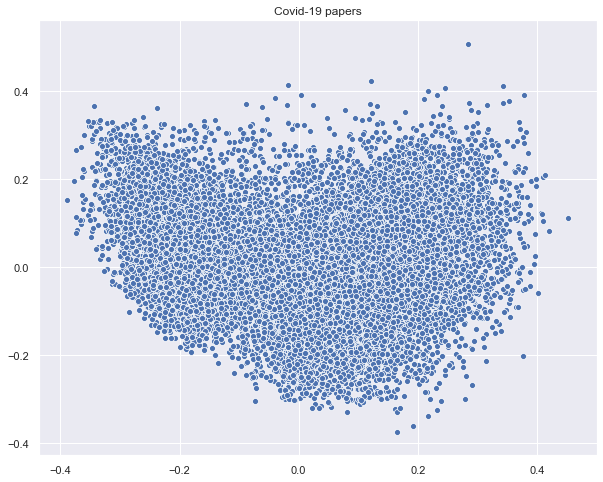

In [117]:
sns.set(rc={'figure.figsize' : (10,8)})
sns.scatterplot(X_pca[:,0] , X_pca[:,1])
plt.title('Covid-19 papers')

In [119]:
from sklearn.cluster import MiniBatchKMeans

Text(0, 0.5, 'WCSS')

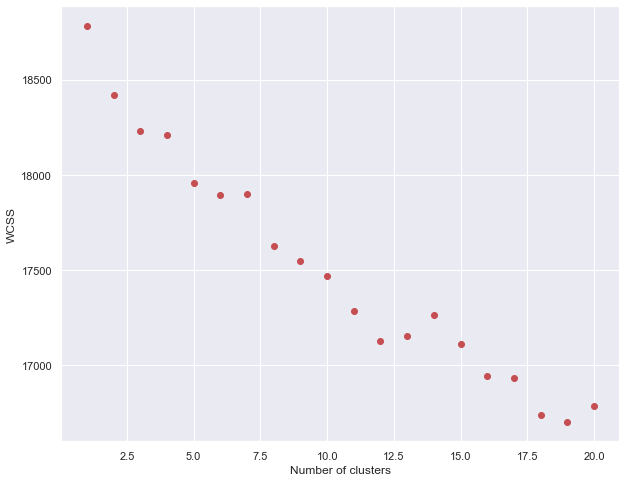

In [120]:
wcss = []
for i in range(1,21):
    kmeans = MiniBatchKMeans(n_clusters = i , random_state = 0)
    kmeans.fit(vectorized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21) , wcss , 'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [125]:
k = 5
kmeans = MiniBatchKMeans(n_clusters = k)
y_pred = kmeans.fit_predict(vectorized)

In [126]:
np.unique(y_pred)

array([0, 1, 2, 3, 4], dtype=int32)

In [127]:
len(y_pred)

20209

Text(0.5, 1.0, 'Clustered Covid-19 papers')

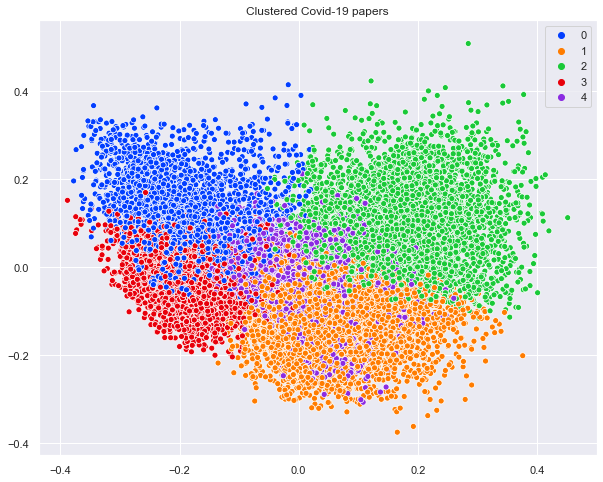

In [128]:
palette = sns.color_palette('bright' , len(set(y_pred)))
sns.scatterplot(X_pca[: , 0] , X_pca[:, 1] , hue = y_pred , legend = 'full'
                , palette = palette)
plt.title('Clustered Covid-19 papers')

In [129]:
#PARTE OPCIONAL ---- COMEÇO
corona_df_original = pd.read_csv('corona_df_original.csv')

In [130]:
corona_df_original.shape

(500, 5)

In [131]:
corona_df_original.head()

,Unnamed: 0,paper_id,title,abstract,text
0,7490,792417a1bbb50a19ce96e8354aa9f16f2424b850,Sepsis and the heart,Introduction Autophagy is well known as one of...,Introduction Acute myocardial depression in se...
1,9082,ad6a3623db73b778bbfabb99c47116c30459e66d,Auxiliary activation of the complement system ...,Activation and regulation of the cascade syste...,Proteases are expressed ubiquitously in all ti...
2,1015,9d08aa9bb599cb599ceaa62f31cb480a5708a5d1,BMC Public Health Delayed Treatment of Diagnos...,Background: Mycobacterium tuberculosis infecti...,Mycobacterium tuberculosis infection has long ...
3,7781,e4065a39d9df47f5987404da83abbf7a10fa57db,Inhibitory effects of magnolol and honokiol on...,Amyloid formation is associated with multiple ...,Magnolol and honokiol inhibited the amyloid fo...
4,727,0f91a79b8aec80b0320b6de47b30c38b3fc4a170,Changes in temperature alter the potential out...,Host shifts-where a pathogen jumps between dif...,Emerging infectious diseases are often the res...


In [132]:
!pip install bert-extractive-summarizer

     |████████████████████████████████| 635 kB 681 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 676 kB 2.5 MB/s eta 0:00:01     |██████████████████████████████  | 634 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 883 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 5.4 MB/s eta 0:00:01
  Created wheel for bert-extractive-summarizer: filename=bert_extractive_summarizer-0.4.2-py3-none-any.whl size=13711 sha256=ee7681518eb6300c297430cef739926090a46c798eb504b54492e8510ff4c494
  Stored in directory: /home/daniel/.cache/pip/wheels/72/dc/37/8f4d3e5a337d48b296ebe21196d99dd5a52d494411b5ff9825
  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893259 sha256=d3499b0333355998df7e7a7bc2a929d30277a06c105062a32bca5bc1f80d6db8
  Stored in directory: /home/daniel/.cache/pip/wheels/69/09/d1/bf058f7d6fa0ecba2ce7c66be3b8d012beb4bf61a6e0c101c0
Successfully bu

In [136]:
from summarizer import Summarizer

ModuleNotFoundError: No module named 'torch'

In [ ]:

text = str(corona_df_original['text'][0])
print(text)

In [ ]:
len(text)

In [ ]:
model = Summarizer()

In [ ]:
result = model(text)

In [ ]:
result = ''.join(result)
print(result)

In [ ]:
len(result)

#FIM DA PARTE OPCIONAL